# **MSW zápočet**

Jmeno a příjmení: **Mykhailo Pastram**

Studentské číslo: **st98759**

Kontaktní email: **michaelpastram@gmail.com**

Datum odevzdání:

Odkaz na repozitář GitHub:

## **1. Knihovny a moduly pro matematické výpočty**

**Zadání:**

Úkolem je změřit potřebný čas pro vyřešení nějakého problému (např.: provést skalární součin, vypočítat určitý integrál) pomocí standardního pythonu a pomocí specializované knihovny. Toto měření provest alespoň pro 5 různých úloh (ne pouze jiná čísla, ale úplně jiné téma) a minimálně porovnat rychlost jednoho modulu se standardním pythonem. Ideálně provest porovnání ještě s dalším modulem a snažit se, ať je kód ve standardním pythonu napsán efektivně.

### **1. Skalární součin dvou vektorů**

**Skalární součin dvou vektorů ve standardním Pythonu:**

In [196]:
from time import process_time

vector_size = 100000 # velikost vektorů
repeat = 1000 # počet opakování výpočtu
a = list(range(vector_size)) # vytvoření vektoru

# funkce pro ručný výpočet skalárního součinu
def dot_product(a, b):
  result = 0
  for i, j in zip(a, b):
    result += i * j
  return result

# měření času výpočtu
start = process_time()
for i in range(repeat):
  dot_product(a, a)
end = process_time()

dot_res_py = dot_product(a, a)
dot_time_py = round(end - start, 10)

# výpis výsledků
print(f"Standardní Python - výsledek: {dot_res_py}, použitý čas: {dot_time_py} sekund")

Standardní Python - výsledek: 333328333350000, použitý čas: 7.34375 sekund


**Skalární součin dvou vektorů pomocí NumPy:**

In [200]:
import numpy as np
from time import process_time

vector_size = 100000 # velikost vektorů
repeat = 1000 # počet opakování výpočtu
arr = np.arange(vector_size, dtype=np.int64) # vytvoření vektoru

# měření času výpočtu
start = process_time()
for i in range(repeat):
  np.dot(arr, arr)
end = process_time()

dot_res_np = np.dot(arr, arr)
dot_time_np = round(end - start, 10)

# výpis výsledků
print(f"NumPy - výsledek: {dot_res_np}, použitý čas: {dot_time_np} sekund")

NumPy - výsledek: 333328333350000, použitý čas: 0.0625 sekund


**Skalární součin dvou vektorů pomocí SciPy:**

In [202]:
import scipy as sp
import numpy as np
from time import process_time

vector_size = 100000 # velikost vektorů
repeat = 1000 # počet opakování výpočtu
arr = np.arange(vector_size, dtype=np.int64) # vytvoření vektoru

# měření času výpočtu
start = process_time()
for i in range(repeat):
  sp.linalg.blas.ddot(arr, arr)
end = process_time()

dot_res_sp = sp.linalg.blas.ddot(arr, arr)
dot_time_sp = round(end - start, 10)

# výpis výsledků
print(f"SciPy - výsledek: {dot_res_sp}, použitý čas: {dot_time_sp} sekund")

SciPy - výsledek: 333328333350000.0, použitý čas: 1.21875 sekund


**Srovnání času:**

In [203]:
print(f"Python: {dot_time_py} sekund")
print(f"NumPy: {dot_time_np} sekund")
print(f"SciPy: {dot_time_sp} sekund")

# porovnání rychlosti výpočtu jednotlivých metod
time_dict = {"standardní Python": dot_time_py,
             "NumPy": dot_time_np,
             "SciPy": dot_time_sp}
min_time = min(time_dict.values())
lib = next(key for key, value in time_dict.items() if value == min_time)

print(f"\nNejrychlejší je {lib} s časem {min_time} sekund")

Python: 7.34375 sekund
NumPy: 0.0625 sekund
SciPy: 1.21875 sekund

Nejrychlejší je NumPy s časem 0.0625 sekund


### **2. Výpočet určitého integrálu**

**Výpočet určitého integrálu ve standardním Pythonu:**

In [210]:
from time import process_time

repeat = 30000 # počet opakování výpočtu

# funkce, kterou chceme vypočítat
def f(x):
  return x**2

a = 0 # dolní mez
b = 1 # horní mez
n = 1000 # počet dělení intervalu

# použijme trapezoidální pravidlo pro ručný výpočet určitého integrálu
def trapezoid_integ(f, a, b, n):
  h = (b - a) / n
  integral = 0.5 * (f(a) + f(b))
  for i in range(1, n):
    integral += f(a + i * h)
  integral *= h
  return integral

# měření času výpočtu
start = process_time()
for i in range(repeat):
  trapezoid_integ(f, a, b, n)
end = process_time()

integ_res_py = trapezoid_integ(f, a, b, n)
integ_time_py = round(end - start, 10)

# výpis výsledků
print(f"Standardní Python - výsledek: {integ_res_py}, použitý čas: {integ_time_py} sekund")

Standardní Python - výsledek: 0.33333349999999995, použitý čas: 7.765625 sekund


**Výpočet určitého integrálu pomocí NumPy:**

In [213]:
import numpy as np
from time import process_time

repeat = 30000 # počet opakování výpočtu

# funkce, kterou chceme vypočítat
def f(x):
  return x**2

a = 0 # dolní mez
b = 1 # horní mez
n = 1000 # počet dělení intervalu

x = np.linspace(a, b, n)
y = f(x)

# měření času výpočtu
start = process_time()
for i in range(repeat):
  np.trapezoid(y, x)
end = process_time()

integ_res_np = np.trapezoid(y, x)
integ_time_np = round(end - start, 10)

# výpis výsledků
print(f"NumPy - výsledek: {integ_res_np}, použitý čas: {integ_time_np} sekund")

NumPy - výsledek: 0.333333500333834, použitý čas: 0.5 sekund


**Výpočet určitého integrálu pomocí SciPy:**

In [214]:
import scipy as sp
from time import process_time

repeat = 30000 # počet opakování výpočtu

# funkce, kterou chceme vypočítat
def f(x):
  return x**2

a = 0 # dolní mez
b = 1 # horní mez

# měření času výpočtu
start = process_time()
for i in range(repeat):
  sp.integrate.quad(f, a, b)
end = process_time()

integ_res_sp, error = sp.integrate.quad(f, a, b)
integ_time_sp = round(end - start, 10)

# výpis výsledků
print(f"SciPy - výsledek: {integ_res_sp}, použitý čas: {integ_time_sp} sekund")

SciPy - výsledek: 0.33333333333333337, použitý čas: 0.28125 sekund


**Srovnání času:**

In [216]:
print(f"Python: {integ_time_py} sekund")
print(f"NumPy: {integ_time_np} sekund")
print(f"SciPy: {integ_time_sp} sekund")

# porovnání rychlosti výpočtu jednotlivých metod
time_dict = {"standardní Python": integ_time_py,
             "NumPy": integ_time_np,
             "SciPy": integ_time_sp}
min_time = min(time_dict.values())
lib = next(key for key, value in time_dict.items() if value == min_time)

print(f"\nNejrychlejší je {lib} s časem {min_time} sekund")

Python: 7.765625 sekund
NumPy: 0.5 sekund
SciPy: 0.28125 sekund

Nejrychlejší je SciPy s časem 0.28125 sekund


### **3. Výpočet funkční hodnoty sinusu**

**Výpočet funkční hodnoty sinusu ve standardním Pythonu:**

In [251]:
import math
from time import process_time

repeat = 1000 # počet opakování výpočtu

# vytvoření vektoru pro výsledek výpočtu
vector_size = 10000
vector = list(range(vector_size))
res_vector = [0]*vector_size

# měření času výpočtu
start = process_time()
for t in range(repeat):
    for i in range(len(res_vector)):
      res_vector[i] = math.sin(vector[i])
end = process_time()

sin_time_py = round(end - start, 10)

# výpis výsledků
print(f"Standardní Python - výsledek: {res_vector[:5]},\npoužitý čas: {sin_time_py} sekund")

Standardní Python - výsledek: [0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282],
použitý čas: 2.0625 sekund


**Výpočet funkční hodnoty sinusu pomocí NumPy:**

In [255]:
import numpy as np
from time import process_time

repeat = 1000 # počet opakování výpočtu

# vytvoření vektoru pro výsledek výpočtu
vector_size = 10000
array = np.arange(vector_size, dtype=np.int64)

# měření času výpočtu
start = process_time()
for t in range(repeat):
    res_array = np.sin(array)
end = process_time()

sin_time_np = round(end - start, 10)

# výpis výsledků
print(f"NumPy - výsledek: {res_array[:5]},\npoužitý čas: {sin_time_np} sekund")

NumPy - výsledek: [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ],
použitý čas: 0.109375 sekund


**Výpočet funkční hodnoty sinusu pomocí SymPy:**

In [246]:
import sympy as smp
from time import process_time

repeat = 5 # počet opakování výpočtu

# vytvoření vektoru pro výsledek výpočtu
vector_size = 10000
array = smp.Array(range(vector_size))

# měření času výpočtu
start = process_time()
for t in range(repeat):
    res_array = smp.Array([smp.sin(x).evalf() for x in array])
end = process_time()

sin_time_smp = round(end - start, 10)

# výpis výsledků
print(f"SymPy - výsledek: {res_array[:5]},\npoužitý čas: {sin_time_smp} sekund")

SymPy - výsledek: [0, 0.841470984807897, 0.909297426825682, 0.141120008059867, -0.756802495307928],
použitý čas: 14.0625 sekund


**Srovnání času:**

In [256]:
print(f"Python: {sin_time_py} sekund")
print(f"NumPy: {sin_time_np} sekund")
print(f"SymPy: {sin_time_smp} sekund")

# porovnání rychlosti výpočtu jednotlivých metod
time_dict = {"standardní Python": sin_time_py,
             "NumPy": sin_time_np,
             "SymPy": sin_time_smp}
min_time = min(time_dict.values())
lib = next(key for key, value in time_dict.items() if value == min_time)

print(f"\nNejrychlejší je {lib} s časem {min_time} sekund")

Python: 2.0625 sekund
NumPy: 0.109375 sekund
SymPy: 14.0625 sekund

Nejrychlejší je NumPy s časem 0.109375 sekund


### **4. Výpočet derivace funkce**

**Výpočet derivace funkce ve standardním Pythonu:**

In [262]:
import math
from time import process_time

repeat = 1000000 # počet opakování výpočtu
x = 1 # bod, podle kterého derivujeme

# funkce derivace
def deriv(f, x, h=1e-5):
  return (f(x + h) - f(x)) / h

# funkce, kterou chceme derivovat
def f(x):
    return x**2 + 3*x + 5

# měření času výpočtu
start = process_time()
for i in range(repeat):
  deriv(f, x)
end = process_time()

deriv_res_py = round(deriv(f, x), 5)
deriv_time_py = round(end - start, 10)

# výpis výsledků
print(f"Standardní Python - výsledek: {deriv_res_py}, použitý čas: {deriv_time_py} sekund")

Standardní Python - výsledek: 5.00001, použitý čas: 0.5625 sekund


**Výpočet derivace funkce pomocí SymPy:**

In [267]:
import sympy as smp
from time import process_time

repeat = 100000 # počet opakování výpočtu
x_point = 1 # bod, podle kterého derivujeme
x = smp.Symbol('x')
f = x**2 + 3*x + 5 # funkce, kterou chceme derivovat

# měření času výpočtu
start = process_time()
for i in range(repeat):
  smp.diff(f, x).subs(x, x_point)
end = process_time()

deriv_res_smp = smp.diff(f, x).subs(x, x_point)
deriv_time_smp = round(end - start, 10)

# výpis výsledků
print(f"SymPy - výsledek: {deriv_res_smp}, použitý čas: {deriv_time_smp} sekund")

SymPy - výsledek: 5, použitý čas: 8.578125 sekund


**Výpočet derivace funkce pomocí FinDiff:**

In [269]:
from findiff import FinDiff
import numpy as np
from time import process_time

repeat = 100000 # počet opakování výpočtu
x = 1 # bod, podle kterého derivujeme
h = 1e-5

# funkce, kterou chceme derivovat
def f(x):
  return x**2 + 3*x + 5

dx = FinDiff(0, h, 1)
x_grid = np.array([x-h, x, x+h], dtype=np.float64)

# měření času výpočtu
start = process_time()
for i in range(repeat):
  f_values = f(x_grid)
  deriv_res_fd = dx(f_values)
end = process_time()

deriv_time_fd = round(end - start, 10)

# výpis výsledků
print(f"FinDiff - výsledek: {deriv_res_fd[1]}, použitý čas: {deriv_time_fd} sekund")

FinDiff - výsledek: 4.999999999988346, použitý čas: 14.0 sekund


**Srovnání času:**

In [270]:
print(f"Python: {deriv_time_py} sekund")
print(f"SymPy: {deriv_time_smp} sekund")
print(f"FinDiff: {deriv_time_fd} sekund")

# porovnání rychlosti výpočtu jednotlivých metod
time_dict = {"standardní Python": deriv_time_py,
             "SymPy": deriv_time_smp,
             "FinDiff": deriv_time_fd}
min_time = min(time_dict.values())
lib = next(key for key, value in time_dict.items() if value == min_time)

print(f"\nNejrychlejší je {lib} s časem {min_time} sekund")

Python: 0.5625 sekund
SymPy: 8.578125 sekund
FinDiff: 14.0 sekund

Nejrychlejší je standardní Python s časem 0.5625 sekund


### **5. Nasobení dvou matic**

**Nasobení dvou matic ve standardním Pythonu:**

In [288]:
from time import process_time

repeat = 50 # počet opakování výpočtu

# funkce pro výpočet součinu dvou matic
def multiply_matrices(matrix1, matrix2):
    rows_matrix1 = len(matrix1)
    cols_matrix1 = len(matrix1[0])
    cols_matrix2 = len(matrix2[0])

    result_matrix = [[0 for _ in range(cols_matrix2)] \
                     for _ in range(rows_matrix1)]

    for i in range(rows_matrix1):
        for j in range(cols_matrix2):
            for k in range(cols_matrix1):
                result_matrix[i][j] += matrix1[i][k] * matrix2[k][j]

    return result_matrix

# vytvoření matice
matrix = [[i * 100 + j + 1 for j in range(100)] for i in range(100)]

# měření času výpočtu
start = process_time()
for t in range(repeat):
    matr_res_py = multiply_matrices(matrix, matrix)
end = process_time()

matr_res_py = [row[:5] for row in matr_res_py[:5]]
matr_time_py = round(end - start, 10)

# výpis výsledků
print(f"Standardní Python - výsledek:")
[print(i) for i in matr_res_py]
print(f"použitý čas: {matr_time_py} sekund")

Standardní Python - výsledek:
[33335050, 33340100, 33345150, 33350200, 33355250]
[82845050, 82860100, 82875150, 82890200, 82905250]
[132355050, 132380100, 132405150, 132430200, 132455250]
[181865050, 181900100, 181935150, 181970200, 182005250]
[231375050, 231420100, 231465150, 231510200, 231555250]
použitý čas: 6.890625 sekund


**Nasobení dvou matic pomocí NumPy:**

In [294]:
import numpy as np
from time import process_time

repeat = 1000 # počet opakování výpočtu

# vytvoření matice
matrix = np.arange(1, 100*100 + 1).reshape(100, 100)

# měření času výpočtu
start = process_time()
for t in range(repeat):
    matr_res_np = np.dot(matrix, matrix)
end = process_time()

matr_time_np = round(end - start, 10)
matr_res_np = [row[:5] for row in matr_res_np[:5]]

# výpis výsledků
print(f"NumPy - výsledek:")
[print(i) for i in matr_res_np]
print(f"použitý čas: {matr_time_np} sekund")

NumPy - výsledek:
[33335050 33340100 33345150 33350200 33355250]
[82845050 82860100 82875150 82890200 82905250]
[132355050 132380100 132405150 132430200 132455250]
[181865050 181900100 181935150 181970200 182005250]
[231375050 231420100 231465150 231510200 231555250]
použitý čas: 0.6875 sekund


**Nasobení dvou matic pomocí SciPy:**

In [293]:
import numpy as np
import scipy as sp
from time import process_time

repeat = 1000 # počet opakování výpočtu

# vytvoření matice
matrix = np.arange(1, 100*100 + 1).reshape(100, 100)
sparse_matrix = sp.sparse.csr_matrix(matrix)

# měření času výpočtu
start = process_time()
for t in range(repeat):
    matr_res_sp = sparse_matrix.dot(sparse_matrix)
end = process_time()

matr_time_sp = round(end - start, 10)

# výpis výsledků
print(f"SciPy - výsledek:")
for i in range(min(5, matr_res_sp.shape[0])):
  row = matr_res_sp[i].toarray()
  row = [j[:5] for j in row[:5]]
  print(row)
print(f"použitý čas: {matr_time_sp} sekund")

SciPy - výsledek:
[array([33335050, 33340100, 33345150, 33350200, 33355250])]
[array([82845050, 82860100, 82875150, 82890200, 82905250])]
[array([132355050, 132380100, 132405150, 132430200, 132455250])]
[array([181865050, 181900100, 181935150, 181970200, 182005250])]
[array([231375050, 231420100, 231465150, 231510200, 231555250])]
použitý čas: 1.921875 sekund


**Srovnání času:**

In [296]:
print(f"Python: {matr_time_py} sekund")
print(f"NumPy: {matr_time_np} sekund")
print(f"SciPy: {matr_time_sp} sekund")

# porovnání rychlosti výpočtu jednotlivých metod
time_dict = {"standardní Python": matr_time_py,
             "NumPy": matr_time_np,
             "SciPy": matr_time_sp}
min_time = min(time_dict.values())
lib = next(key for key, value in time_dict.items() if value == min_time)

print(f"\nNejrychlejší je {lib} s časem {min_time} sekund")

Python: 6.890625 sekund
NumPy: 0.6875 sekund
SciPy: 1.921875 sekund

Nejrychlejší je NumPy s časem 0.6875 sekund


## **2. Vizualizace dat**

**Zadání:**

Vybrat si nějakou zajímavou datovou sadu na webovém portále Kaggle a provest datovou analýzu datové sady. Využit k tomu různé typy grafů a interpretovat je (minimálně alespoň 5 zajímavých grafů).

Pro tento úkol jsem vzal datovou sadu z portalu Kaggle. Dataset poskytuje informace o cca 3500 pacientech a obsahuje 15 kritéria, z nichž každý představuje potenciální rizikový faktor pro kardiovaskulární onemocnění. Tyto kritéria zahrnovaly demografické, behaviorální a zdravotní rizikové faktory. Budeme se snažit najít nějaké zavislostí mezi rizikové faktory a případnými kardiovaskulárními potíže u různých osob.

### **1. Počet osob s hypertenzí podle různých věkových kategorií**

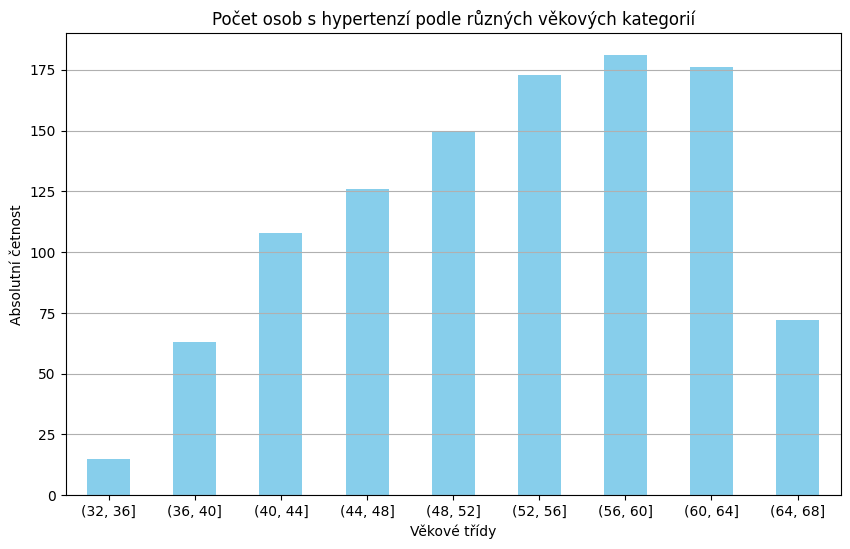

In [300]:
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# rozdělení na věkové kategorie
bins = range(df['age'].min(), df['age'].max() + 1, 4)
df['age_groups'] = pd.cut(df['age'], bins=bins)

# data pro graf (osoby s hypertenzí)
data = df[df['prevalentHyp'] == 1].groupby('age_groups', observed=False).size()

# vytvoření grafu
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='skyblue')
plt.title('Počet osob s hypertenzí podle různých věkových kategorií')
plt.xlabel('Věkové třídy')
plt.ylabel('Absolutní četnost')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Na tomto sloupcovém grafu vidíme rozdělení lidí s hypertenzí podle věkových kategorií. Na jeho základě lze říci, že nejvíce lidí s hypertenzí je ve věku 50 let a více. Můžeme usoudit, že senioři jsou ohroženi kardiovaskulárními onemocnění víc než mladé lidé.

### **2. Korelace mezi indexem tělesné hmotnosti a systolickém tlakem**

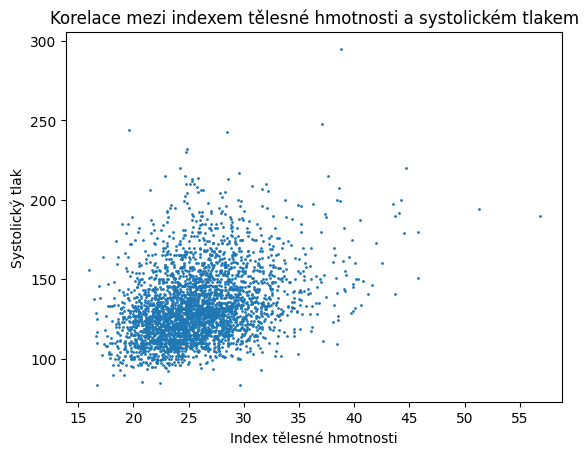

In [302]:
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# vytvoření grafu
plt.scatter(df['BMI'], df['sysBP'], s=1)
plt.xlabel('Index tělesné hmotnosti')
plt.ylabel('Systolický tlak')
plt.title('Korelace mezi indexem tělesné hmotnosti a systolickém tlakem')
plt.show()

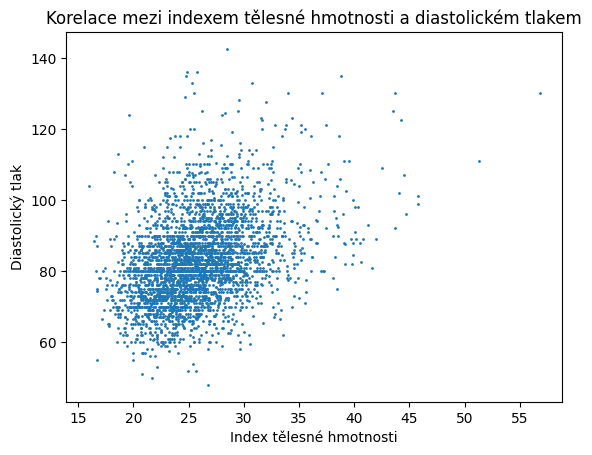

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# vytvoření grafu
plt.scatter(df['BMI'], df['diaBP'], s=1)
plt.xlabel('Index tělesné hmotnosti')
plt.ylabel('Diastolický tlak')
plt.title('Korelace mezi indexem tělesné hmotnosti a diastolickém tlakem')
plt.show()

Na základě těchto dvou bodových grafů lze říci o mirné zavislosti mezi indexem tělesné hmotnosti a systolickém tlakem, a také indexem tělesné hmotnosti a diastolickém tlakem u zkoumaných jednotlivců. To může znamenat, že nadváha může způsobit zvyšení systolického a diastolického tlaku, což je jedným z faktorů rizika pro kardiovaskulární onemocnění.

### **3. Porovnání krevního tlaku u osob ohrožených a neohrožených kardiovaskulárními onemocněními**

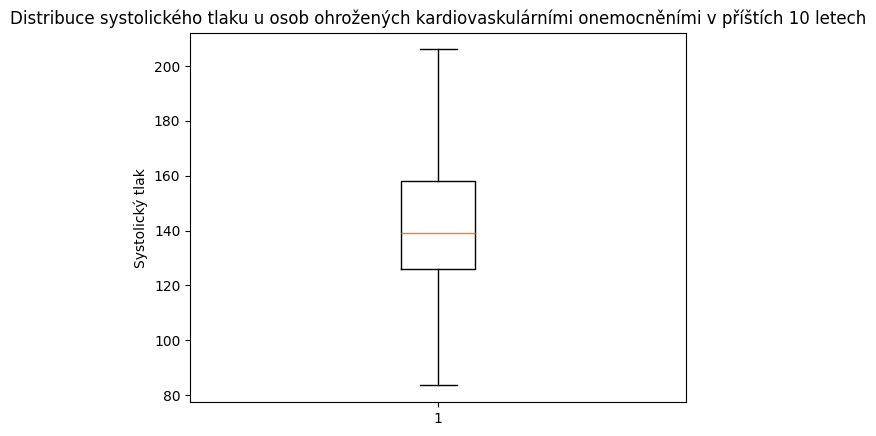

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# data pro graf (osoby ohrožené kardiovaskulárními onemocněními v příštích 10 letech)
data = df[df['TenYearCHD'] == 1]

# vytvoření grafu
plt.boxplot(data['sysBP'], showfliers=False)
plt.title("Distribuce systolického tlaku u osob ohrožených kardiovaskulárními onemocněními v příštích 10 letech")
plt.ylabel("Systolický tlak")
plt.show()

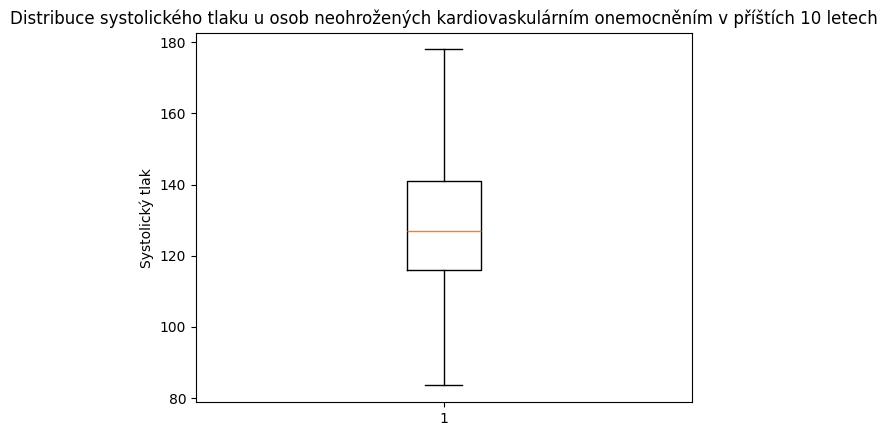

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# data pro graf (osoby neohrožené kardiovaskulárními onemocněními v příštích 10 letech)
data = df[df['TenYearCHD'] == 0]

# vytvoření grafu
plt.boxplot(data['sysBP'], showfliers=False)
plt.title("Distribuce systolického tlaku u osob neohrožených kardiovaskulárním onemocněním v příštích 10 letech")
plt.ylabel("Systolický tlak")
plt.show()

Na základě těchto dvou krabicových grafu můžeme vidět distribuce dat systolického tlaku u osob ohrožených a neohrožených kardiovaskulárními onemocněními v příštích 10 letech. Median tlaku u ohrožených je cca 140 a u neohrožených je cca 128. 50% dat u ohrožených se nacházejí v rozmezi 125-160, u neohrožených v rozmezi 115-140.

### **4. Úroveň vzdělání u osob s hypertenzí a bez**

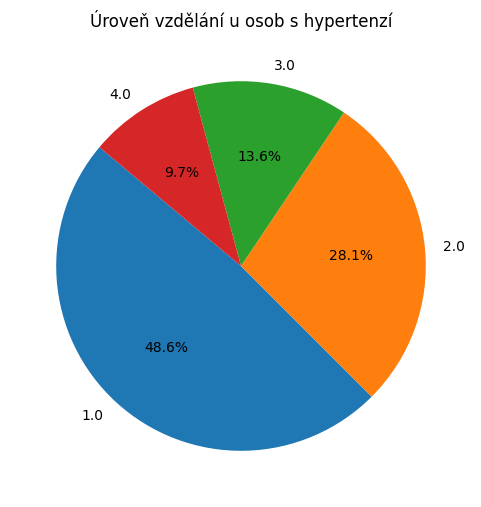

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# data pro graf (osoby s hypertenzí a jejich vzdělání)
data = df[df['prevalentHyp'] == 1]
education = data['education'].value_counts().sort_index()

# vytvoření grafu
plt.figure(figsize=(6, 6))
plt.pie(education, labels=education.index, autopct='%1.1f%%', startangle=140)
plt.title('Úroveň vzdělání u osob s hypertenzí')
plt.show()

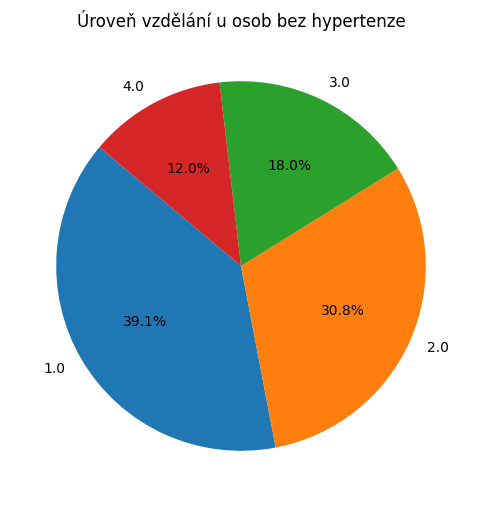

In [310]:
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# data pro graf (osoby bez hypertenze a jejich vzdělání)
data = df[df['prevalentHyp'] == 0]
education = data['education'].value_counts().sort_index()

# vytvoření grafu
plt.figure(figsize=(6, 6))
plt.pie(education, labels=education.index, autopct='%1.1f%%', startangle=140)
plt.title('Úroveň vzdělání u osob bez hypertenze')
plt.show()

Na základě kolačových grafů je vidět, že existuje rozdíl mezi distribucí úrovně vzdělání u osob s hypertenzí a bez. Ale podle mě tento rozdíl není významný a moc neovlivňuje riziko vzníku kardiovaskulárních onemocnění. Však si můžeme všimnout, že lidé bez hypertenze jsou v průměru vzdělanější než lidé s hypertenzí.

### **5. Korelace mezi růžné ukazatele**

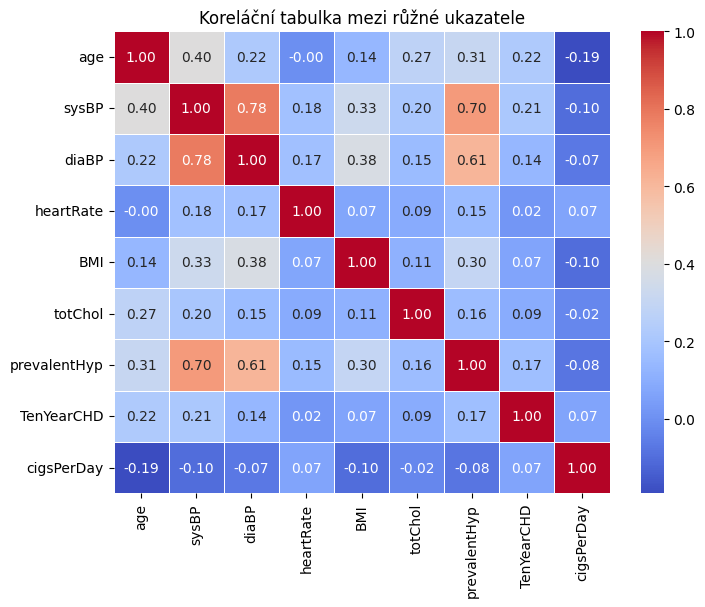

In [315]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# import dat
df = pd.read_csv('C:\\Users\\Михаил\\Desktop\\MSW\\data_cardiovascular_risk.csv')

# data pro graf (různorodá kritétia)
data = pd.DataFrame({
    'age': df['age'],
    'sysBP': df['sysBP'],
    'diaBP': df['diaBP'],
    'heartRate': df['heartRate'],
    'BMI': df['BMI'],
    'totChol': df['totChol'],
    'prevalentHyp': df['prevalentHyp'],
    'TenYearCHD': df['TenYearCHD'],
    'cigsPerDay': df['cigsPerDay']
})

# výpočet korelací
correlation_matrix = data.corr()

# vytvoření koreláční tabulky
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Koreláční tabulka mezi růžné ukazatele')
plt.show()

Na závěr vyskoušíme různé ukazatele pro nalezení koreláčních vztahů mezi nimi.
Nejzajmavější z nich jsou:

- věk a systolický tlak - 0.40
- index tělesné hmotnosti a systolický tlak - 0.33
- index tělesné hmotnosti a diastolický tlak - 0.38
- index tělesné hmotnosti a hypertenzie - 0.30
- věk a úroveň cholesterolu - 0.27

### **Celkový závěr**

Na základě předchozích grafů můžeme přibližně určit osobu ohroženou kardiovaskulárními onemocněními:

- Je věkem od 50 let a víc
- Má nadváhu
- Má systolický tlak v průměru 140
- Má systolický tlak nejčastějí v rozmezi 125-160
- Obvykle má základní (primární) vzdělávání
- Má zvýšený cholesterol

## **3. Úvod do lineární algebry**

**Zadání:**

Vytvořit graf, kde na ose x bude velikost čtvercové matice a na ose y průměrný čas potřebný k nalezení uspokojivého řešení. Cílem je nalézt takovou velikost matice, od které je výhodnější využít iterační metodu.

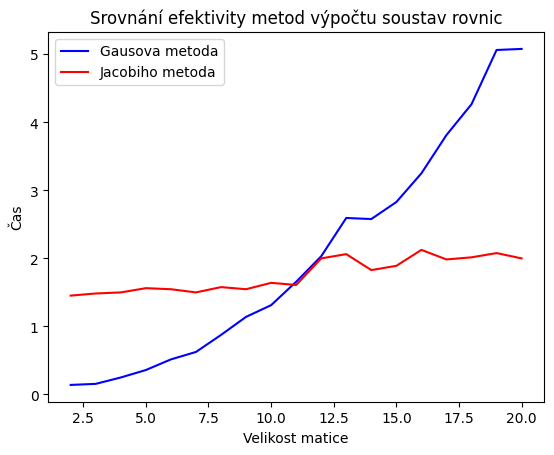

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time


# Gaussova eliminační (přímá) metoda pro řešení soustav lineárních rovnic
def gaussian_elimination(A, b):
    n = len(A)
    
    # přetypování rozšířené matice na float64
    Ab = np.column_stack((A, b)).astype(np.float64)

    # přímá eliminace
    for i in range(n):
        for j in range(i + 1, n):
            ratio = Ab[j, i] / Ab[i, i]
            Ab[j] -= ratio * Ab[i]

    # zpětná substituce
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, :-1], x)) / Ab[i, i]
    return x


# Jacobiho (iterační) metoda pro řešení soustav lineárních rovnic
def jacobi(A, b, niteraci):
    x0=np.ones(len(A))
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    
    for i in range(niteraci):
      x = (b - np.matmul((L + U),x))/D
    return x


# osy grafu
x = [] # velikost čtvercové matice
y1 = [] # čas Gaussove metody
y2 = [] # čas Jacobiho metody


# vytvoření soustav různé velikosti s nahodnými hodnotami
for i in range(2, 21):
    x.append(i)
    A = np.random.randint(10, 100, size=(i, i))
    B = np.random.randint(10, 100, size=(i, 1))

    # měření času výpočtu Gaussove metody
    start = process_time()
    for j in range(10001):
        X = gaussian_elimination(A, B)
    end = process_time()
    y1.append(end - start)

    # měření času výpočtu Jacobiho metody
    start = process_time()
    for j in range(10001):
        X = jacobi(A, B, 20)
    end = process_time()
    y2.append(end - start)


# vytvoření grafu
plt.plot(x, y1, label='Gausova metoda', color='blue')
plt.plot(x, y2, label='Jacobiho metoda', color='red')
plt.xlabel('Velikost matice')
plt.ylabel('Čas')
plt.title('Srovnání efektivity metod výpočtu soustav rovnic')
plt.legend()
plt.show()

**Výsldek:**

Určitě výsledek takového zkoumání zavisí na tom jak velké jsou koeficienty v rovnicích. Generoval jsem nahodné hodnoty v interválu od 10 do 99 a výpočet byl proveden 10000 krát pro obě metody. S ohledem na tyto podmínky, podle grafu můžeme vidět, že má cenu použivat Jacobiho iterační metodu při velikosti matice 10, 11, 12 a více.

## **4. Interpolace a aproximace funkce jedné proměnné**

**Zadání:**

Cílem tohoto zadání je vybrat si 3 rozdílné funkce (např. polynom, harmonická funkce, logaritmus), přidat do nich šum (trošku je v každém z bodů rozkmitejte), a vyberte náhodně některé body. Poté proveďte interpolaci nebo aproximaci funkce pomocí alespoň 3 rozdílných metod a porovnejte, jak jsou přesné. Přesnost porovnáte s daty, které měly původně vyjít. Vhodnou metrikou pro porovnání přesnosti je součet čtverců (rozptylů), které vzniknou ze směrodatné odchylky mezi odhadnutou hodnotou a skutečnou hodnotou.

### **1. Polynomická funkce**

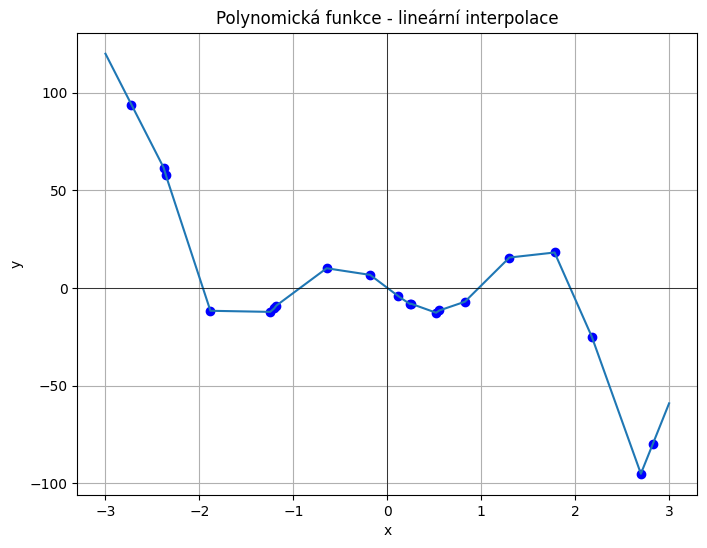

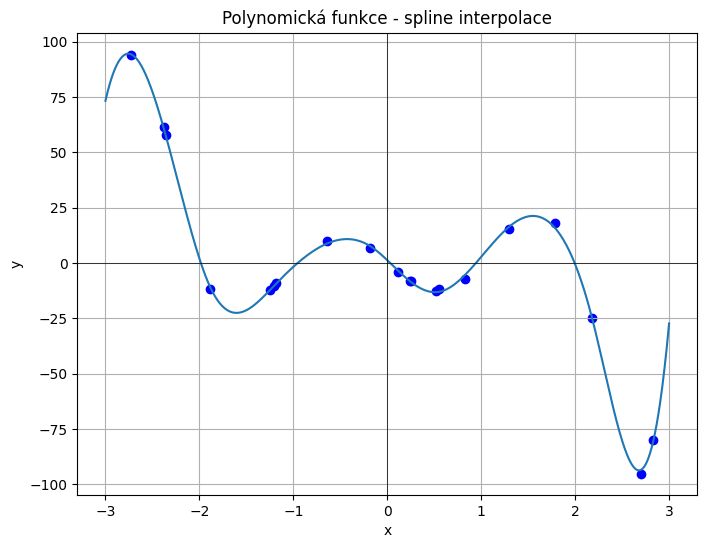

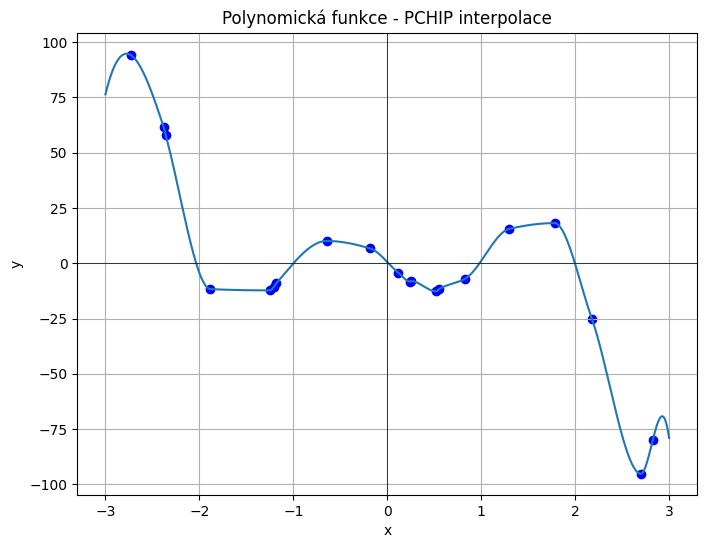

Polynomická funkce:
Lineární interpolace: 203003.25207749792
Spline interpolace: 63816.57087926469
PCHIP interpolace: 109531.10415922315


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline, PchipInterpolator

# polynomická funkce
def f(x):
    return x**7 - 14*x**5 + 49*x**3 - 36*x

# hodnoty pro osu x
x = np.linspace(-3, 3, 1000)

# hodnoty funkce
y = f(x)

# přidání šumu
y_noisy = y + np.random.normal(0, 0.5, size=y.shape)

# výběr náhodných bodů
np.random.seed(500)
random_points = np.random.choice(len(x), size=20, replace=False)
x_random_points = x[random_points]
y_random_points = y_noisy[random_points]

# seřadění bodů
sorted_points = np.argsort(x_random_points)
x_random_points = x_random_points[sorted_points]
y_random_points = y_random_points[sorted_points]

# lineární interpolace
linear_interp1 = interp1d(x_random_points, y_random_points, kind='linear', fill_value="extrapolate")

# spline interpolace
spline_interp1 = UnivariateSpline(x_random_points, y_random_points)

# pchip interpolace
pchip = PchipInterpolator(x_random_points, y_random_points)

# vykreslení grafu (lineární interpolace)
plt.figure(figsize=(8, 6))
plt.plot(x, linear_interp1(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Polynomická funkce - lineární interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# vykreslení grafu (spline interpolace)
plt.figure(figsize=(8, 6))
plt.plot(x, spline_interp1(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Polynomická funkce - spline interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# vykreslení grafu pchip interpolace
plt.figure(figsize=(8, 6))
plt.plot(x, pchip(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Polynomická funkce - PCHIP interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# funkce pro výpočet metriky přesnosti interpolace
def accuracy_interpol(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

# porovnání přesnosti metod
linear_acc = accuracy_interpol(y, linear_interp1(x))
spline_acc = accuracy_interpol(y, spline_interp1(x))
pchip_acc = accuracy_interpol(y, pchip(x))

print("Polynomická funkce:")
print(f"Lineární interpolace: {linear_acc}")
print(f"Spline interpolace: {spline_acc}")
print(f"PCHIP interpolace: {pchip_acc}")

Na základě měření přesnosti metod interpolace a grafů, nejvhodnější pro polynomickou funkci je spline interpolace.

### **2. Harmonická funkce**

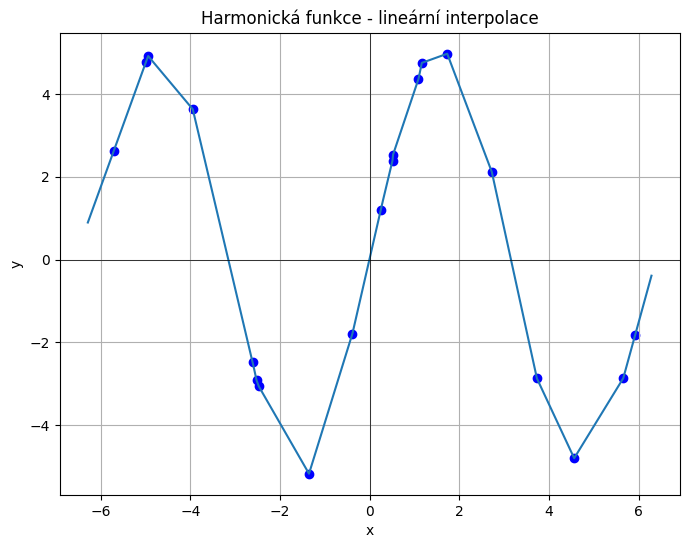

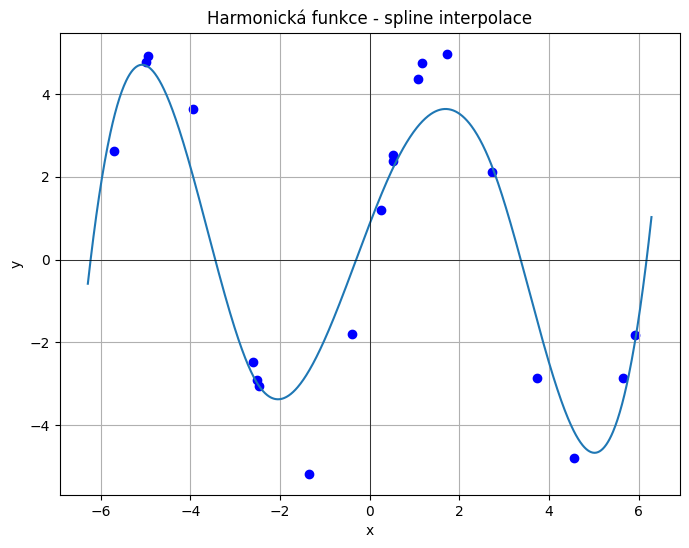

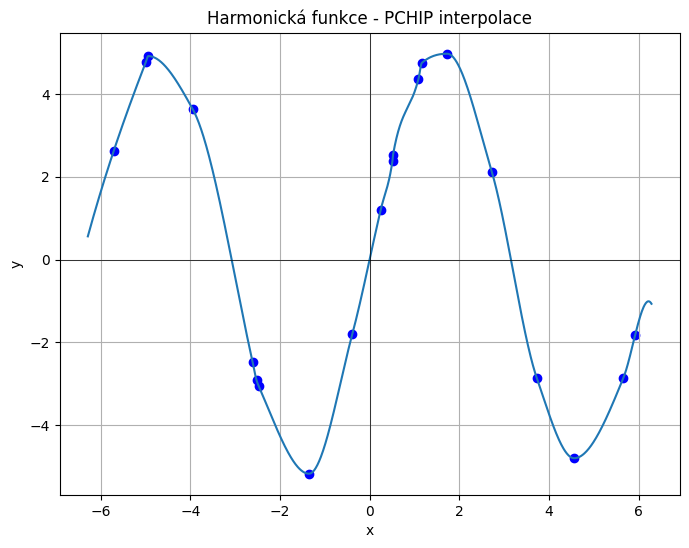

Harmonická funkce:
Lineární interpolace: 92.49519081830678
Spline interpolace: 1232.3713262449087
PCHIP interpolace: 47.01835658510702


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline, PchipInterpolator

# hodnoty pro osu x
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# harmonická (sinusová) funkce
y = 5 * np.sin(x)

# přidání šumu
y_noisy = y + np.random.normal(0, 0.1, size=y.shape)

# výběr náhodných bodů
np.random.seed(500)
random_points = np.random.choice(len(x), size=20, replace=False)
x_random_points = x[random_points]
y_random_points = y_noisy[random_points]

# seřadění bodů
sorted_points = np.argsort(x_random_points)
x_random_points = x_random_points[sorted_points]
y_random_points = y_random_points[sorted_points]

# lineární interpolace
linear_interp1 = interp1d(x_random_points, y_random_points, kind='linear', fill_value="extrapolate")

# spline interpolace
spline_interp1 = UnivariateSpline(x_random_points, y_random_points)

# pchip interpolace
pchip = PchipInterpolator(x_random_points, y_random_points)

# vykreslení grafu (lineární interpolace)
plt.figure(figsize=(8, 6))
plt.plot(x, linear_interp1(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Harmonická funkce - lineární interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# vykreslení grafu (spline interpolace)
plt.figure(figsize=(8, 6))
plt.plot(x, spline_interp1(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Harmonická funkce - spline interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# vykreslení grafu pchip interpolace
plt.figure(figsize=(8, 6))
plt.plot(x, pchip(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Harmonická funkce - PCHIP interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# funkce pro výpočet metriky přesnosti interpolace
def accuracy_interpol(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

# porovnání přesnosti metod
linear_acc = accuracy_interpol(y, linear_interp1(x))
spline_acc = accuracy_interpol(y, spline_interp1(x))
pchip_acc = accuracy_interpol(y, pchip(x))

print("Harmonická funkce:")
print(f"Lineární interpolace: {linear_acc}")
print(f"Spline interpolace: {spline_acc}")
print(f"PCHIP interpolace: {pchip_acc}")

Na základě měření přesnosti metod interpolace a grafů, nejvhodnější pro harmonickou funkci je PCHIP interpolace.

### **3. Logaritmická funkce**

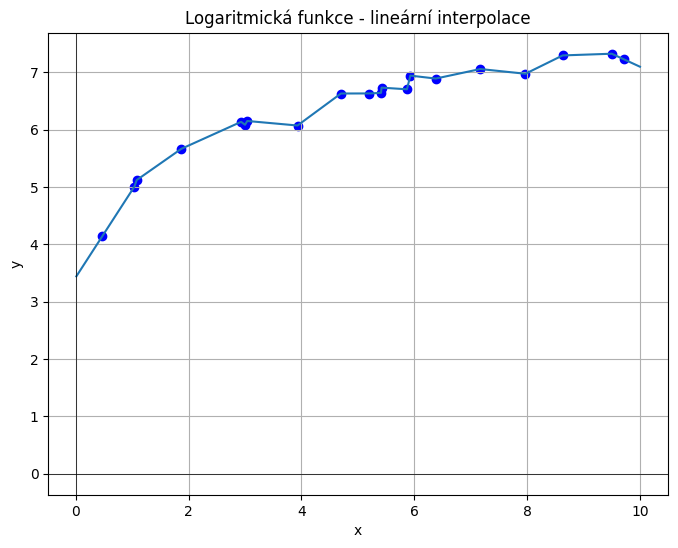

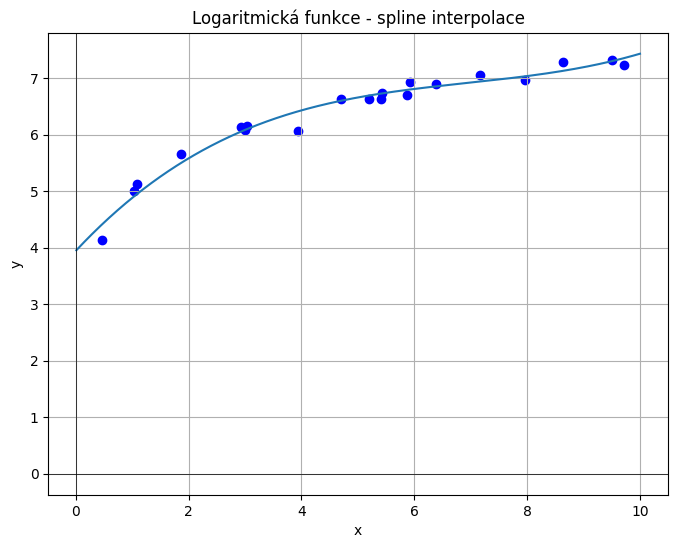

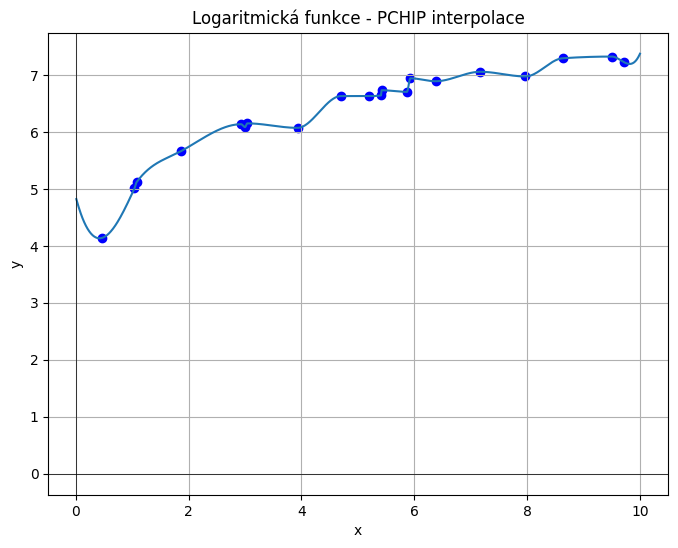

Logaritmická funkce:
Lineární interpolace: 42.18248685940803
Spline interpolace: 67.41171654205691
PCHIP interpolace: 116.60930390151893


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline, PchipInterpolator

# hodnoty pro osu x
x = np.linspace(0.01, 10, 1000)

# logaritmická funkce
y = np.log(x) + 5

# přidání šumu
y_noisy = y + np.random.normal(0, 0.1, size=y.shape)

# výběr náhodných bodů
np.random.seed(500)
random_points = np.random.choice(len(x), size=20, replace=False)
x_random_points = x[random_points]
y_random_points = y_noisy[random_points]

# seřadění bodů
sorted_points = np.argsort(x_random_points)
x_random_points = x_random_points[sorted_points]
y_random_points = y_random_points[sorted_points]

# lineární interpolace
linear_interp1 = interp1d(x_random_points, y_random_points, kind='linear', fill_value="extrapolate")

# spline interpolace
spline_interp1 = UnivariateSpline(x_random_points, y_random_points)

# pchip interpolace
pchip = PchipInterpolator(x_random_points, y_random_points)

# vykreslení grafu (lineární interpolace)
plt.figure(figsize=(8, 6))
plt.plot(x, linear_interp1(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Logaritmická funkce - lineární interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# vykreslení grafu (spline interpolace)
plt.figure(figsize=(8, 6))
plt.plot(x, spline_interp1(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Logaritmická funkce - spline interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# vykreslení grafu pchip interpolace
plt.figure(figsize=(8, 6))
plt.plot(x, pchip(x))
plt.scatter(x_random_points, y_random_points, color='blue')
plt.title('Logaritmická funkce - PCHIP interpolace')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# funkce pro výpočet metriky přesnosti interpolace
def accuracy_interpol(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

# porovnání přesnosti metod
linear_acc = accuracy_interpol(y, linear_interp1(x))
spline_acc = accuracy_interpol(y, spline_interp1(x))
pchip_acc = accuracy_interpol(y, pchip(x))

print("Logaritmická funkce:")
print(f"Lineární interpolace: {linear_acc}")
print(f"Spline interpolace: {spline_acc}")
print(f"PCHIP interpolace: {pchip_acc}")

Na základě měření přesnosti metod interpolace a grafů, nejvhodnější pro logaritmickou funkci je lineární interpolace.

## **6. Generování náhodných čísel a testování generátorů**

**Zadání:**

Úkolem je vytvořit vlastní generátor semínka do pseudonáhodných algoritmů. Jazyk Python umí sbírat přes ovladače hardwarových zařízení různá fyzická a fyzikální data. Můžete i sbírat data z historie prohlížeče, snímání pohybu myší, vyzvání uživatele zadat náhodné úhozy do klávesnice a jiná unikátní data uživatelů.

In [77]:
import os
import time
import random
import hashlib
import uuid
from pynput import mouse, keyboard
from random import randint, seed


# genarátor semínka do pseudonáhodných algoritmů
def gen_seed():
    entropy_data = []
    
    # sběr pozice myši
    def on_move(x, y):
        entropy_data.append(f"Mouse position: {x},{y}")
    
    # sběr kliknuti myši
    def on_click(x, y, button, pressed):
        entropy_data.append(f"Mouse click: {x},{y} {button} {'Pressed' if pressed else 'Released'}")
    
    # sběr scrollu myši
    def on_scroll(x, y, dx, dy):
        entropy_data.append(f"Mouse scroll: {dx},{dy}")
    
    # sběr náhodných úhozů klávesnice
    def on_press(key):
        entropy_data.append(f"Key pressed: {key}")
    
    def on_release(key):
        entropy_data.append(f"Key released: {key}")
    
    # start posluchačů pro myš a klávesnici
    mouse_listener = mouse.Listener(on_move=on_move, on_click=on_click, on_scroll=on_scroll)
    keyboard_listener = keyboard.Listener(on_press=on_press, on_release=on_release)
    mouse_listener.start()
    keyboard_listener.start()
    
    # časový údaj jako zdroj entropie
    entropy_data.append(f"Current time: {time.time_ns()}")
    
    # systémové informace jako zdroj entropie
    entropy_data.append(f"UUID: {uuid.uuid4()}")
    entropy_data.append(f"MAC Address: {':'.join(['{:02x}'.format((uuid.getnode() >> elements) & 0xff) for elements in range(0,2*6,2)])}")
    
    # ukončení posluchačů po 5 sekundách
    time.sleep(5)
    mouse_listener.stop()
    keyboard_listener.stop()
    
    # kombinace a hashování dat
    combined_entropy = ''.join(entropy_data)
    new_seed = int(hashlib.sha256(combined_entropy.encode('utf-8')).hexdigest(), 16)
    
    print(f"Generated seed: {new_seed}")
    
    return new_seed


# po každém nastavení semínka se vyresetuje generátor
seminko = gen_seed()
seed(seminko)
rand_numb = [randint(1,9) for i in range(10)]
print(rand_numb)

Generated seed: 95852145335061310401260586839254847050783489836168740864337440035496701492901
[4, 8, 9, 9, 4, 1, 3, 6, 8, 4]


## **9. Integrace funkce jedné proměnné**

**Zadání:**

Úkolem je vybrat si 3 různorodé funkce (polynom, harmonická funkce, logaritmus/exponenciála) a vypočíst určitý integrál na dané funkci od nějakého počátku do nějakého konečného bodu. Porovnejte, jak si každá z metod poradila s vámi vybranou funkcí na základě přesnosti vůči analytickému řešení.

### **1. Polynomická funkce**

In [21]:
import numpy as np
from scipy import integrate

# polynomická funkce
def f(x):
    return 12*x**5 + 5*x**3 - 10*x + 2

a = 0 # dolní mez
b = 2 # horní mez
dx = 0.1 # šířka vzorkování


# integrace lichoběžníkovým pravidlem
def trapezoid_naive(a, b, dx):
    integral = 0
    x = a
    i = 0
    while x < b:
        integral += dx * (f(x) + f(x+dx))/2
        x += dx
    return integral

print("Lichoběžníkové pravidlo (naivní):", trapezoid_naive(a, b, dx))


# integrace ve formě Newtonových-Cotesových vzorců
def newton_integ(a, b, dx):
    n = int((b-a)//dx)+1
    integral = f(a) + f(b)
    for i in range(1, n):
        integral += 2*f(a+i*dx)
    integral *= dx/2
    return integral

print("Newtonové-Cotesové vzorce:", newton_integ(a, b, dx))


# lichoběžníkové pravidlo (numpy)
x = np.arange(a, b+dx, dx)
y = f(x)

print("Lichoběžníkové pravidlo (numpy):", np.trapezoid(y, dx=dx))


# lichoběžníkové pravidlo (scipy)
print(f"Lichoběžníkové pravidlo (scipy): {integrate.trapezoid(y, x=x)}")


# simpson integrace
x = np.arange(a, b+dx, dx)
y = f(x)

print(f"Simpson integrace (scipy): {integrate.simpson(y=y, x=x)}")


# quad integrace
print(f"Quad integrace (scipy): {integrate.quad(f, a, b)}")


print("Analytické řešení: I(12*x**5 + 5*x**3 - 10*x + 2)(0, 2) = 132")

Lichoběžníkové pravidlo (naivní): 132.84960000000015
Newtonové-Cotesové vzorce: 132.84960000000004
Lichoběžníkové pravidlo (numpy): 132.84960000000007
Lichoběžníkové pravidlo (scipy): 132.8496
Simpson integrace (scipy): 132.00160000000002
Quad integrace (scipy): (132.0, 1.482988473445133e-12)
Analytické řešení: I(12*x**5 + 5*x**3 - 10*x + 2)(0, 2) = 132


Nejpřesnější metoda vůči analytickému řešení je Quad (scipy).

### **2. Harmonická funkce**

In [27]:
import numpy as np
from scipy import integrate

# harmonická funkce
def f(x):
    return np.exp(2*x)*np.sin(3*x)

a = 0 # dolní mez
b = np.pi/4 # horní mez
dx = 0.1 # šířka vzorkování


# integrace lichoběžníkovým pravidlem
def trapezoid_naive(a, b, dx):
    integral = 0
    x = a
    i = 0
    while x < b:
        integral += dx * (f(x) + f(x+dx))/2
        x += dx
    return integral

print("Lichoběžníkové pravidlo (naivní):", trapezoid_naive(a, b, dx))


# integrace ve formě Newtonových-Cotesových vzorců
def newton_integ(a, b, dx):
    n = int((b-a)//dx)+1
    integral = f(a) + f(b)
    for i in range(1, n):
        integral += 2*f(a+i*dx)
    integral *= dx/2
    return integral

print("Newtonové-Cotesové vzorce:", newton_integ(a, b, dx))


# lichoběžníkové pravidlo (numpy)
x = np.arange(a, b+dx, dx)
y = f(x)

print("Lichoběžníkové pravidlo (numpy):", np.trapezoid(y, dx=dx))


# lichoběžníkové pravidlo (scipy)
print(f"Lichoběžníkové pravidlo (scipy): {integrate.trapezoid(y, x=x)}, {integrate.trapezoid(y, dx=dx)}")


# simpson integrace
x = np.arange(a, b+dx, dx)
y = f(x)

print(f"Simpson integrace (scipy): {integrate.simpson(y=y, x=x)}, {integrate.simpson(y=y, dx=dx)}")


# quad integrace
print(f"Quad integrace (scipy): {integrate.quad(f, a, b)}")


print("Analytické řešení: I(exp(2*x)*sin(3*x))(0, pi/4) = 1.5390466")

Lichoběžníkové pravidlo (naivní): 1.5822945212217365
Newtonové-Cotesové vzorce: 1.5850910283252468
Lichoběžníkové pravidlo (numpy): 1.5822945212217367
Lichoběžníkové pravidlo (scipy): 1.5822945212217367, 1.5822945212217367
Simpson integrace (scipy): 1.5882112125125967, 1.5882112125125967
Quad integrace (scipy): (1.5390466064711934, 1.7086849784755312e-14)
Analytické řešení: I(exp(2*x)*sin(3*x))(0, pi/4) = 1.5390466


Nejpřesnější metoda vůči analytickému řešení je Quad (scipy).

### **3. Logaritmická funkce**

In [36]:
import numpy as np
from scipy import integrate

# logaritmická funkce
def f(x):
    return 3*np.log(x + 7) + 5

a = 0 # dolní mez
b = 1 # horní mez
dx = 0.1 # šířka vzorkování


# integrace lichoběžníkovým pravidlem
def trapezoid_naive(a, b, dx):
    integral = 0
    x = a
    i = 0
    while x < b:
        integral += dx * (f(x) + f(x+dx))/2
        x += dx
    return integral

print("Lichoběžníkové pravidlo (naivní):", trapezoid_naive(a, b, dx))


# integrace ve formě Newtonových-Cotesových vzorců
def newton_integ(a, b, dx):
    n = int((b-a)//dx)+1
    integral = f(a) + f(b)
    for i in range(1, n):
        integral += 2*f(a+i*dx)
    integral *= dx/2
    return integral

print("Newtonové-Cotesové vzorce:", newton_integ(a, b, dx))


# lichoběžníkové pravidlo (numpy)
x = np.arange(a, b+dx, dx)
y = f(x)

print("Lichoběžníkové pravidlo (numpy):", np.trapezoid(y, dx=dx))


# lichoběžníkové pravidlo (scipy)
print(f"Lichoběžníkové pravidlo (scipy): {integrate.trapezoid(y, x=x)}")


# simpson integrace
x = np.arange(a, b+dx, dx)
y = f(x)

print(f"Simpson integrace (scipy): {integrate.simpson(y=y, x=x)}")


# quad integrace
print(f"Quad integrace (scipy): {integrate.quad(f, a, b)}")


print("Analytické řešení: I(3*np.log(x + 7) + 5)(0, 1) = 11.042484")

Lichoběžníkové pravidlo (naivní): 12.168135068602945
Newtonové-Cotesové vzorce: 11.042439228099212
Lichoběžníkové pravidlo (numpy): 11.04243922809921
Lichoběžníkové pravidlo (scipy): 11.04243922809921
Simpson integrace (scipy): 11.042483866948105
Quad integrace (scipy): (11.042483870154484, 1.2259619841697415e-13)
Analytické řešení: I(3*np.log(x + 7) + 5)(0, 1) = 11.042484


Nejpřesnější metody vůči analytickému řešení je Quad (scipy) a Simpson (scipy).